# Extraindo informações 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('../../../data/mock.csv')
df = pd.DataFrame(data)

## Tratando DF

In [58]:
colunas = ['time_stamp']+[f'pergunta_{str(numero).zfill(0)}' for numero in range(1, 22)] + ['termos','nome', 'mail_01','idade','educacao','sexo','estado','trabalho','funcao','mail_02']

data.columns = colunas

#removendo as pessoas que discordaram dos termos e condições. 
df_com_termos = df[df['termos'] != 'Não']

#removendo pessoas com emails díspares
df_com_email_coreto = df[df_com_termos['mail_01'] == df_com_termos['mail_02']]
df = df_com_email_coreto
df.head()

,time_stamp,pergunta_1,pergunta_2,pergunta_3,pergunta_4,pergunta_5,pergunta_6,pergunta_7,pergunta_8,pergunta_9,...,termos,nome,mail_01,idade,educacao,sexo,estado,trabalho,funcao,mail_02
0,18/08/2023 10:23:07,2,1,3,0,2,1,3,0,2,...,Sim,Junior Silva,daniel@gmail.com,19-30,Ensino Fundamental incompleto,Masculino,SP,construtor,Não,daniel@gmail.com
1,18/08/2023 10:23:07,2,2,3,4,2,3,1,2,3,...,Sim,Marina Silva,marina@gmail.com,19-30,Ensino Fundamental completo,Feminino,SP,construtor,Sim,marina@gmail.com
2,18/08/2023 16:03:02,0,1,1,1,3,0,3,1,3,...,Sim,Natael Sampaio,natael_engenheiro@gmail.com,31-40,Ensino Médio completo,Masculino,SP,Engenheiro,Não,natael_engenheiro@gmail.com
3,18/08/2023 16:30:03,3,3,3,3,3,3,3,3,3,...,Sim,Caroline Yu,carol@beheart.app,31-40,Ensino Superior completo,Feminino,SP,Publi,Sim,carol@beheart.app
5,22/08/2023 07:59:26,2,1,0,0,2,3,0,1,3,...,Sim,João Marcondes,joaomarcondes@gmail.com,41-50,Ensino Superior completo,Masculino,SP,Engenheiro,Não,joaomarcondes@gmail.com


## Criando novo DF para geração dos gráficos individuais


In [59]:
#questões 
perguntas_d = [3, 5, 10, 13, 16, 17, 21]
perguntas_a = [2, 4, 7, 9, 15, 19, 20]
perguntas_s = [1, 6, 8, 11, 12, 14, 18]

#média pra cada categoria: depressão, ansiedade e estresse 
df['d_score'] = df[[f'pergunta_{num}' for num in perguntas_d]].mean(axis=1).round(1)
df['a_score'] = df[[f'pergunta_{num}' for num in perguntas_a]].mean(axis=1).round(1)
df['s_score'] = df[[f'pergunta_{num}' for num in perguntas_s]].mean(axis=1).round(1)

#criar novo df e dropar da df principal essas colunas recém criadas
user_score_df = df[['nome', 'd_score', 'a_score', 's_score']].copy()
df.drop(['d_score', 'a_score', 's_score'], axis=1, inplace=True)

user_score_df.head()


,nome,d_score,a_score,s_score
0,Junior Silva,1.6,1.6,1.6
1,Marina Silva,1.7,2.3,1.7
2,Natael Sampaio,1.7,1.6,0.9
3,Caroline Yu,3.0,3.0,3.0
5,João Marcondes,1.4,1.6,1.3


## Gerando gráficos a partir do novo DF

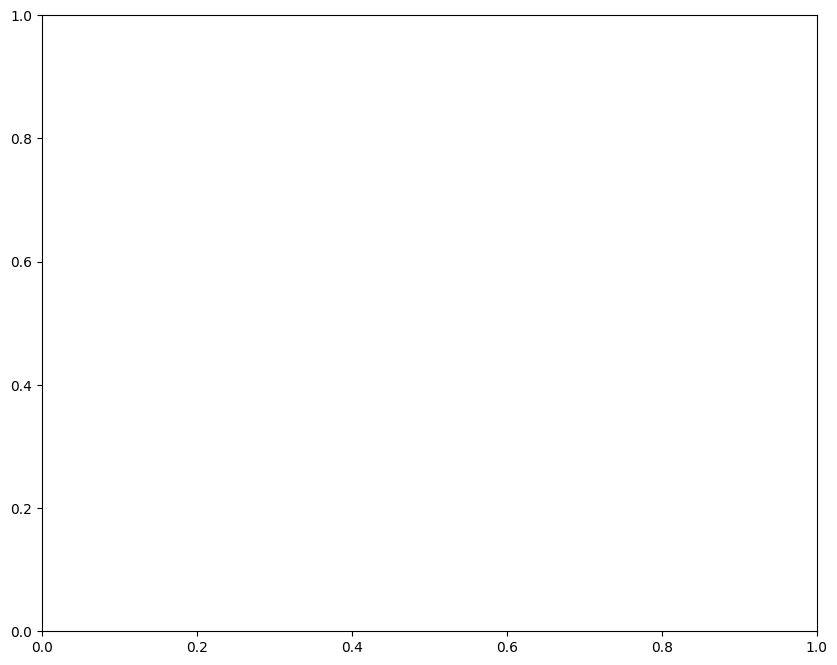

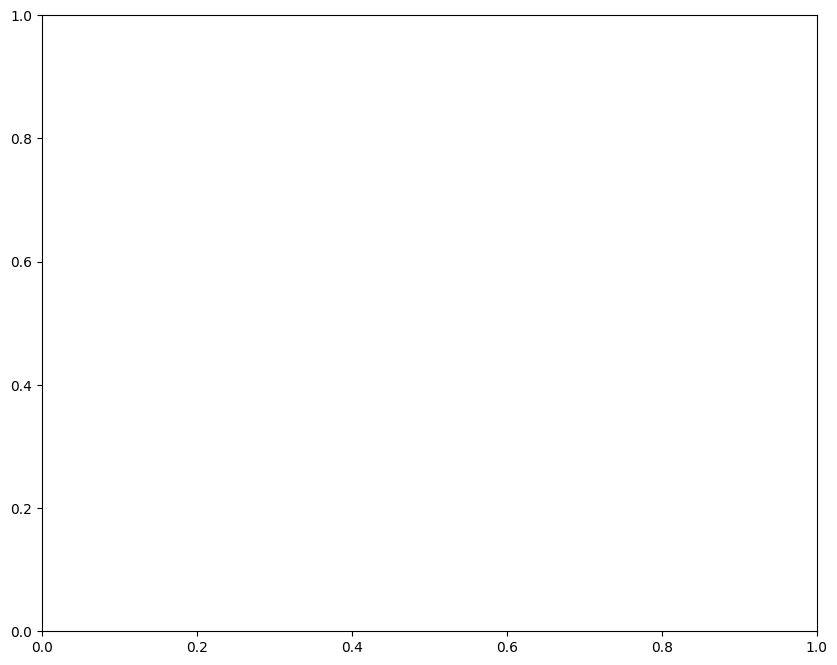

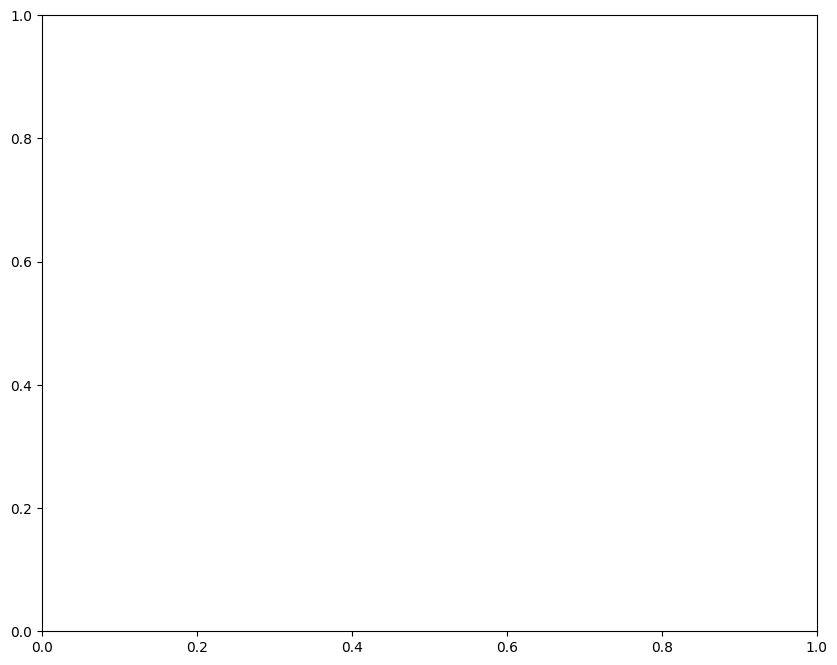

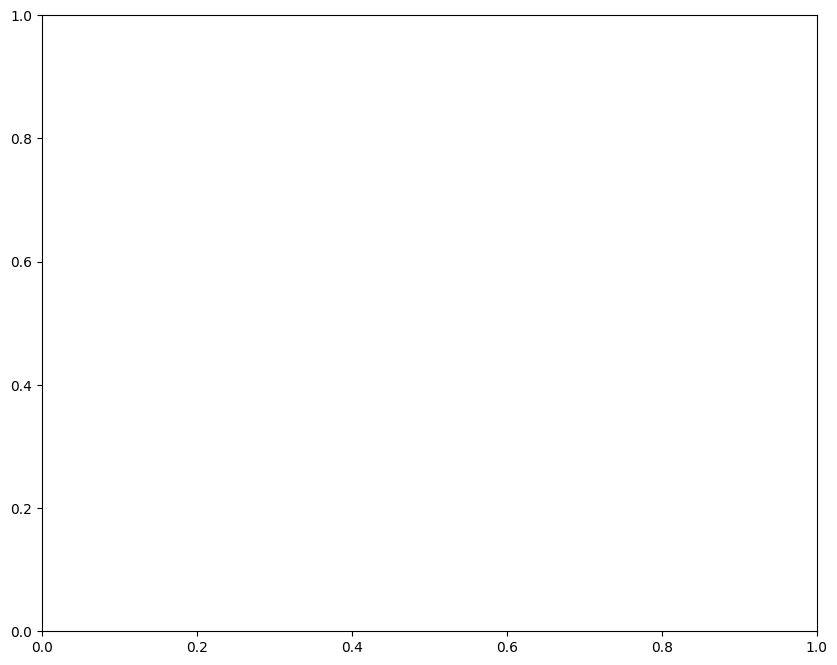

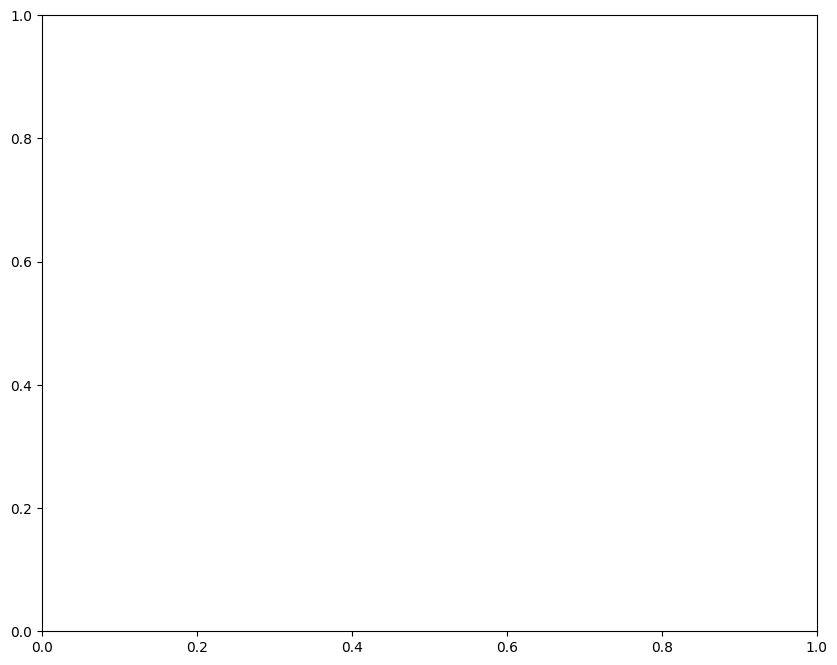

In [62]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

SAVE_PATH = '../../../outputs/'

for index, row in user_score_df.iterrows():

    nome = row['nome'] 
    
    
    scores = row.drop('nome')
    x_texto = [f"Depressão\n\n{row['d_score']}%", f"Ansiedade\n\n{row['a_score']}%", f"Estresse\n\n{row['s_score']}%"]
    fig, axs = plt.subplots( figsize=(10, 5))
    bar_labels = ['red', 'blue', 'green']
    bar_colors = ['tab:red', 'tab:blue', 'tab:green']
    plt.bar(x_texto, scores.values, color=bar_colors)
    plt.title(f'{nome} Pontuação')
    
    plt.ylim(0,4)


    # salvando
    chart_filename = f'{nome}_chart.png'
    chart_path = SAVE_PATH + chart_filename
    plt.savefig(chart_path)
    plt.close()


